# Ouray Defensible Space - Data Analysis (pre-modeling)

Author: **Bryce A Young** (git bryceayoung) | 
Created: **2024-02-15** | 
Modified: **2025-02-15**

In this notebook, we analyze data relationships and distributions of defensible space features of buildings in Ouray County. The dataframe that we use for this analysis was created in `hiz/ouray_hiz.ipynb`.

#### Data 
- (tabular) hiz_feat.csv

#### Workflow 
- Unstructured, freeform exploration of data distributions and relationships (it might be messy)

## Step 0: Setup Environment
---

In [21]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder (contains footprint centroids with hiz info)
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Step 1: Non-Spatial Data Analysis
---

In [2]:
import pandas as pd

df = pd.read_csv(os.path.join(out, 'hiz_feat.csv'))
df.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         4533 non-null   object 
 1   wui_class      4533 non-null   int64  
 2   min_ssd        4533 non-null   float64
 3   mean_cc0_2m    4513 non-null   float64
 4   mean_cc2_4m    4513 non-null   float64
 5   mean_cc4_8m    4513 non-null   float64
 6   mean_cc8_40m   4513 non-null   float64
 7   intersections  4533 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 283.4+ KB


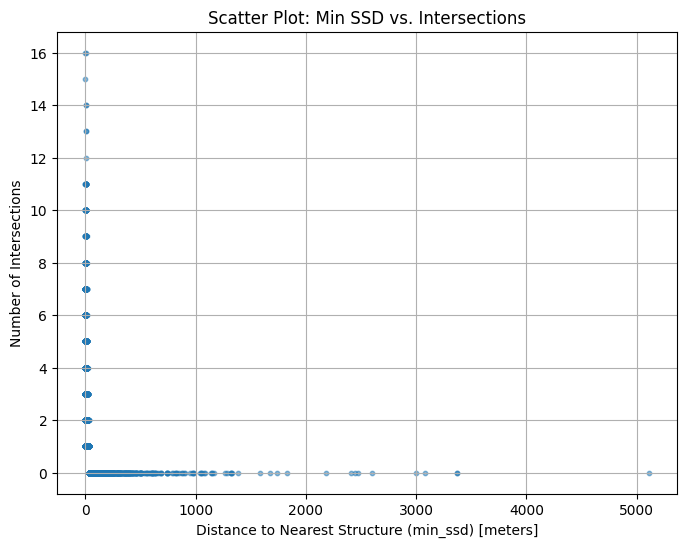

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of min_ssd vs. intersections
plt.figure(figsize=(8, 6))
plt.scatter(df['min_ssd'], df['intersections'], alpha=0.5, s=10)
plt.xlabel('Distance to Nearest Structure (min_ssd) [meters]')
plt.ylabel('Number of Intersections')
plt.title('Scatter Plot: Min SSD vs. Intersections')
plt.grid(True)
plt.show()

<Axes: ylabel='min_ssd'>

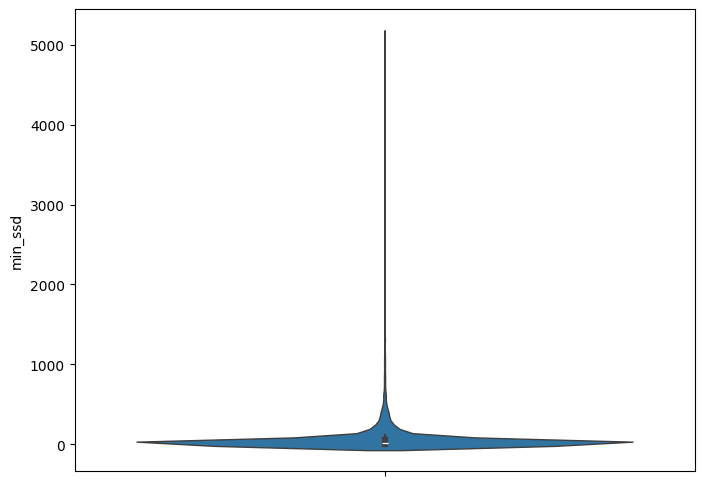

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot for min_ssd
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['min_ssd'], inner="box", linewidth=1)

<Axes: ylabel='intersections'>

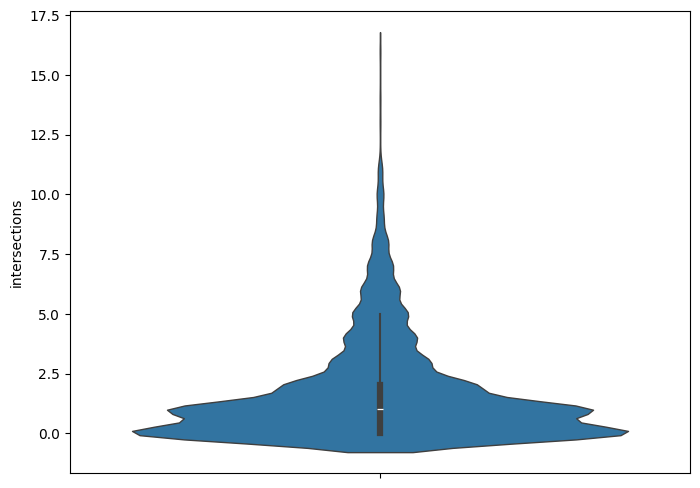

In [5]:
# Create a violin plot for number of adjacent structures
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['intersections'], inner="box", linewidth=1)

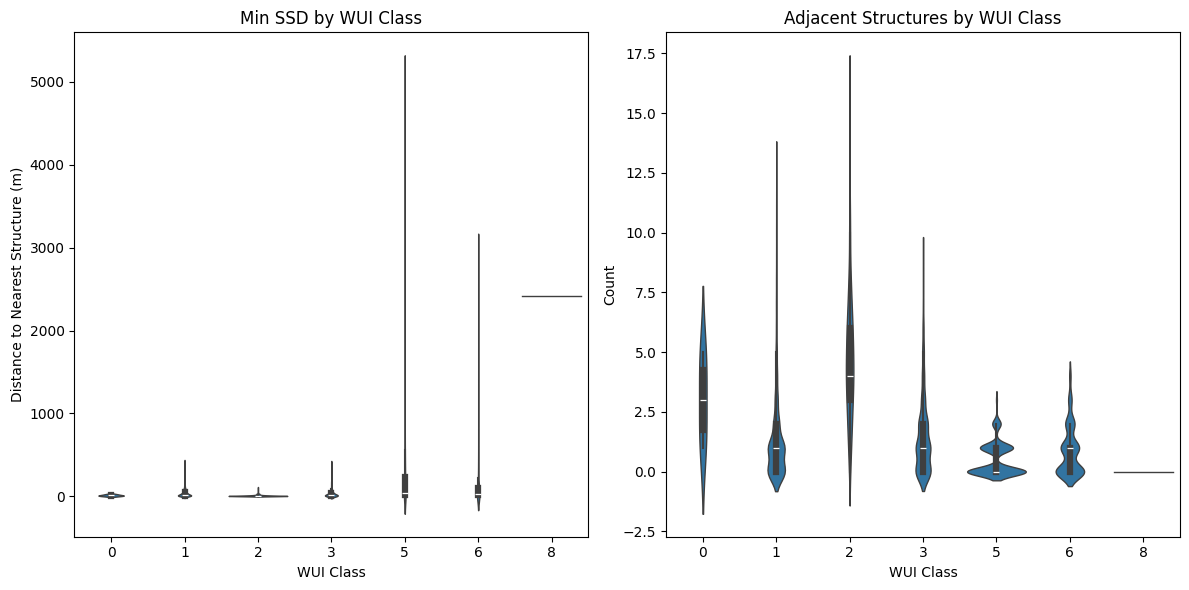

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Violin plot for min_ssd grouped by wui_class
plt.subplot(1, 2, 1)
sns.violinplot(x=df['wui_class'], y=df['min_ssd'], inner="box", linewidth=1)
plt.xlabel("WUI Class")
plt.ylabel("Distance to Nearest Structure (m)")
plt.title("Min SSD by WUI Class")

# Violin plot for intersections grouped by wui_class
plt.subplot(1, 2, 2)
sns.violinplot(x=df['wui_class'], y=df['intersections'], inner="box", linewidth=1)
plt.xlabel("WUI Class")
plt.ylabel("Count")
plt.title("Adjacent Structures by WUI Class")

# Show the plots
plt.tight_layout()
plt.show()

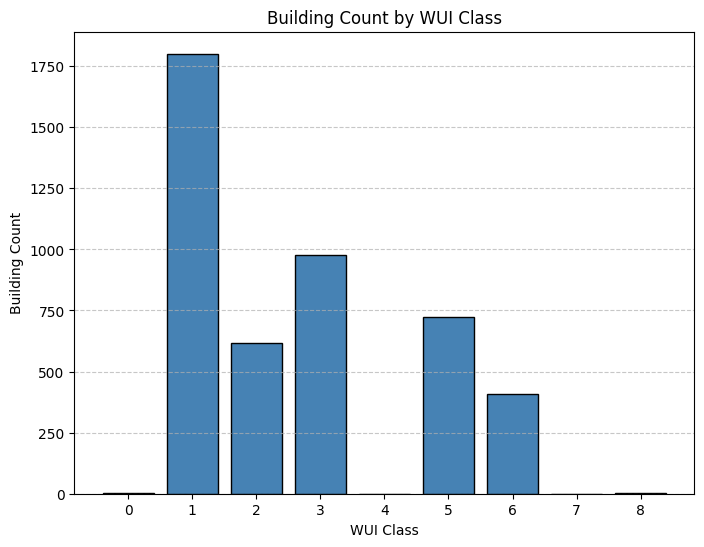

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of homes per WUI class
wui_counts = df['wui_class'].value_counts().sort_index()
# Ensure classes 4 and 7 are displayed even if they have no data
wui_classes = np.arange(0, 9)  # WUI classes 0 through 8
wui_counts = wui_counts.reindex(wui_classes, fill_value=0)
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(wui_classes)  # Ensure all WUI classes are labeled
plt.bar(wui_counts.index, wui_counts.values, color="steelblue", edgecolor="black")
# Labels and title
plt.xlabel("WUI Class")
plt.ylabel("Building Count")
plt.title("Building Count by WUI Class")

plt.show()

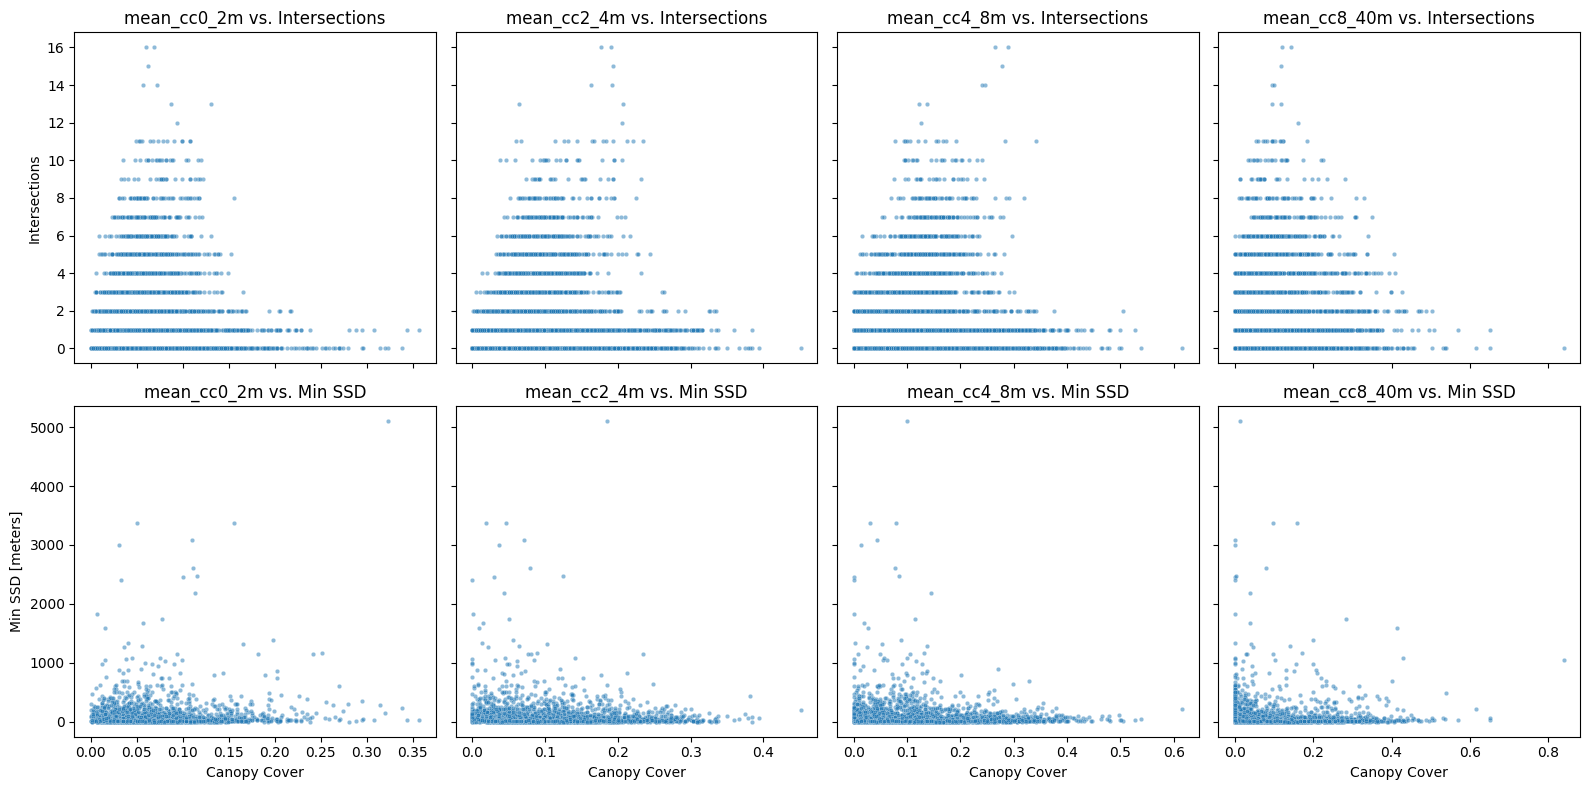

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the grid layout for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey='row', sharex='col')

# Canopy cover classes
canopy_classes = ['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']

# Plot each canopy cover class against intersections (top row) and min_ssd (bottom row)
for i, cc in enumerate(canopy_classes):
    # Scatter plot: canopy cover vs. intersections
    sns.scatterplot(x=df[cc], y=df['intersections'], alpha=0.5, s=10, ax=axes[0, i])
    axes[0, i].set_title(f"{cc} vs. Intersections")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Intersections" if i == 0 else "")

    # Scatter plot: canopy cover vs. min_ssd
    sns.scatterplot(x=df[cc], y=df['min_ssd'], alpha=0.5, s=10, ax=axes[1, i])
    axes[1, i].set_title(f"{cc} vs. Min SSD")
    axes[1, i].set_xlabel("Canopy Cover")
    axes[1, i].set_ylabel("Min SSD [meters]" if i == 0 else "")

plt.tight_layout()
plt.show()


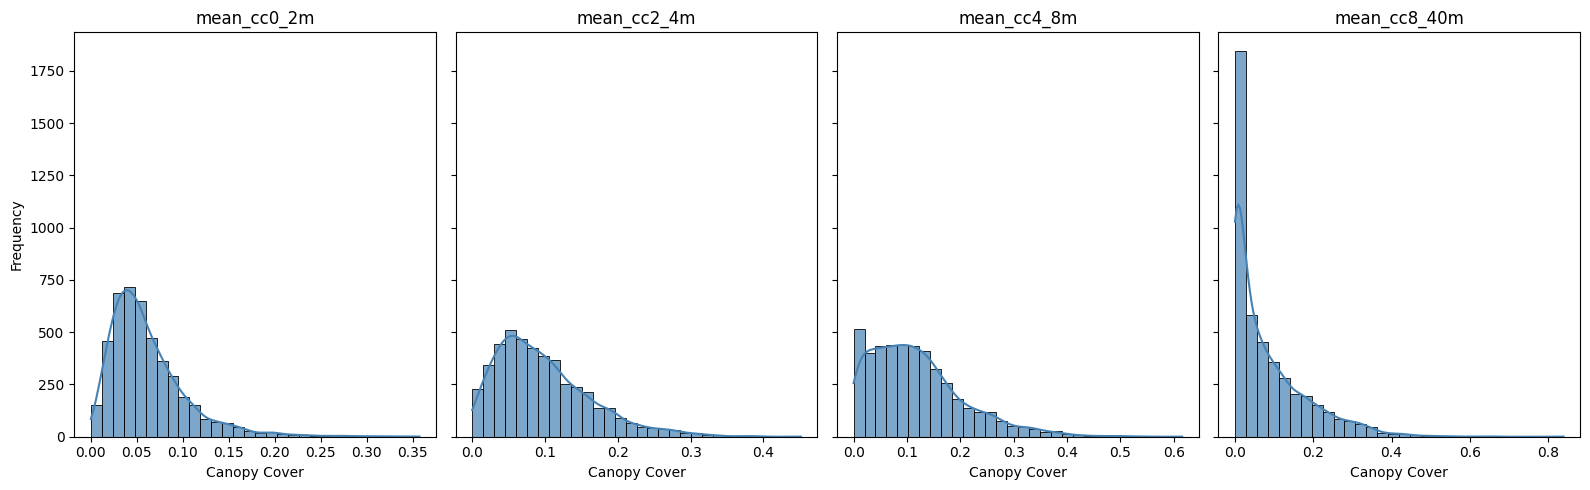

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots for KDE overlays on separate canopy cover histograms
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)

# Canopy cover classes
canopy_classes = ['mean_cc0_2m', 'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m']

# Plot histogram with KDE overlay for each canopy cover metric
for i, cc in enumerate(canopy_classes):
    sns.histplot(df[cc].dropna(), bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.7, ax=axes[i])
    axes[i].set_title(cc)
    axes[i].set_xlabel("Canopy Cover")
    if i == 0:
        axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



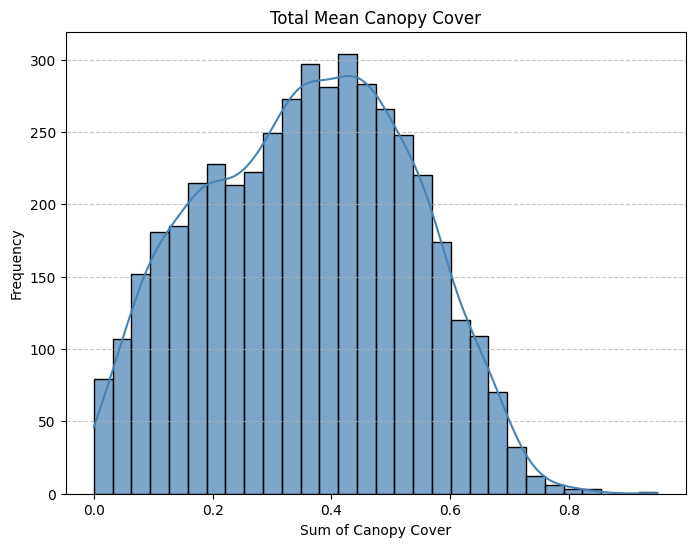

In [19]:
# KDE overlay for the aggregate sum of canopy cover
plt.figure(figsize=(8, 6))
sns.histplot(df["sum_cc"].dropna(), bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("Sum of Canopy Cover")
plt.ylabel("Frequency")
plt.title("Total Mean Canopy Cover")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



## Step 2: Spatial Data Analysis
---

The next notebook in this process is going to be `data_prep/parcel_joins.ipynb`. In that notebook, we will take the scratch gdf we just created and do a spatial join that will assign each row to a parcel in the Ouray tax assessor records.